In [3]:
import numpy as np
import matplotlib.pyplot as plt

class NeuralNetwork:
    def __init__(self, input_neurons, hidden_neurons, output_neurons, learning_rate):
        # Initialize weights and biases
        self.w1 = np.random.randn(input_neurons, hidden_neurons)
        self.b1 = np.random.randn(hidden_neurons)
        self.w2 = np.random.randn(hidden_neurons, output_neurons)
        self.b2 = np.random.randn(output_neurons)
        self.learning_rate = learning_rate

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def sigmoid_derivative(self, x):
        return x * (1 - x)
    
    def forward_pass(self, x):
        self.z1 = np.dot(x, self.w1) + self.b1 # w1.x + b1
        self.a1 = self.sigmoid(self.z1) # Apply sigmoid activation function f(z) = sigmoid(z)
        
        self.z2 = np.dot(self.a1, self.w2) + self.b2 # sigmoid(z1).w2 + b2
        self.output = self.sigmoid(self.z2) # Apply sigmoid activation function

        return self.output
    
    def compute_loss(self, y_pred, y_true):
        return np.mean((y_pred - y_true) ** 2)

    def backpropagate(self, x, y_true, y_pred):
        error_output = y_pred - y_true
        d_output = error_output * self.sigmoid_derivative(y_pred)

        error_hidden = d_output.dot(self.w2.T)
        d_hidden = error_hidden * self.sigmoid_derivative(self.a1)

        self.w2 = self.a1.T.dot(d_output) * self.learning_rate
        self.b1 = np.sum(d_hidden, axis=0) * self.learning_rate

        self.w1 = x.T.dot(d_hidden) * self.learning_rate
        self.b1 = np.sum(d_hidden, axis=0) * self.learning_rate

    def train(self, X, y, epochs=5000):
        for epoch in range(epochs):
            y_pred = self.forward_pass(X)

            # compute loss
            loss = self.compute_loss(y_pred, y)

            # Backpropagation and weights update
            self.backpropagate(X, y, y_pred)

            if epoch % 1000 == 0:
                print(self.w1, self.w2)
                print(f"Epoch {epoch}, Loss: {loss:.4f}")

    def predict(self, X):
        return self.forward_pass(X)

## Train model for predicting the house price by sq. feet

[[0.]] [[-3983.69206945]]
Epoch 0, Loss: 86784080016.7783
[[0.]] [[-1854.63700014]]
Epoch 1000, Loss: 86784019306.9409
[[0.]] [[-1854.63700014]]
Epoch 2000, Loss: 86784019306.9409
[[0.]] [[-1854.63700014]]
Epoch 3000, Loss: 86784019306.9409


/tmp/ipykernel_37644/2748672155.py:14: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


[[0.]] [[-1854.63700014]]
Epoch 4000, Loss: 86784019306.9409
[[0.]] [[-1854.63700014]]
Epoch 5000, Loss: 86784019306.9409
[[0.]] [[-1854.63700014]]
Epoch 6000, Loss: 86784019306.9409
[[0.]] [[-1854.63700014]]
Epoch 7000, Loss: 86784019306.9409
[[0.]] [[-1854.63700014]]
Epoch 8000, Loss: 86784019306.9409
[[0.]] [[-1854.63700014]]
Epoch 9000, Loss: 86784019306.9409
[[0.]] [[-1854.63700014]]
Epoch 10000, Loss: 86784019306.9409
[[0.]] [[-1854.63700014]]
Epoch 11000, Loss: 86784019306.9409
[[0.]] [[-1854.63700014]]
Epoch 12000, Loss: 86784019306.9409
[[0.]] [[-1854.63700014]]
Epoch 13000, Loss: 86784019306.9409
[[0.]] [[-1854.63700014]]
Epoch 14000, Loss: 86784019306.9409
[[0.]] [[-1854.63700014]]
Epoch 15000, Loss: 86784019306.9409
[[0.]] [[-1854.63700014]]
Epoch 16000, Loss: 86784019306.9409
[[0.]] [[-1854.63700014]]
Epoch 17000, Loss: 86784019306.9409
[[0.]] [[-1854.63700014]]
Epoch 18000, Loss: 86784019306.9409
[[0.]] [[-1854.63700014]]
Epoch 19000, Loss: 86784019306.9409
[[0.]] [[-1854

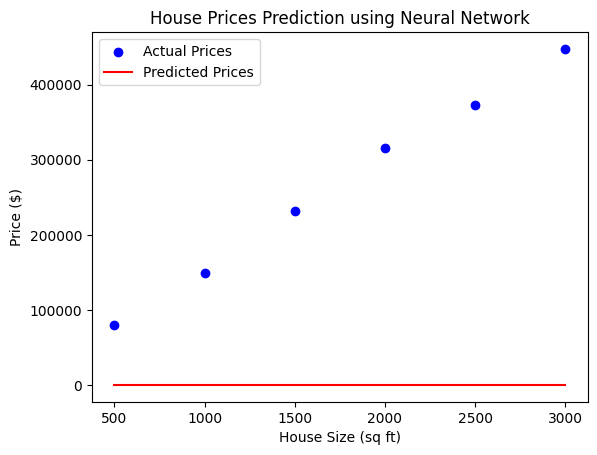

In [4]:
# Create some synthetic data for house sizes and corresponding prices
np.random.seed(42)
X = np.array([[500], [1000], [1500], [2000], [2500], [3000]])
y = X * 150 + (np.random.randn(*X.shape) * 10000) # Random Noise

nn = NeuralNetwork(input_neurons=1, hidden_neurons=1, output_neurons=1, learning_rate=0.01)
nn.train(X, y, epochs = 50000)

predictions = nn.predict(X)

# Plotting the data
plt.scatter(X, y, color="blue", label="Actual Prices") # Actual prices
plt.plot(X, predictions, color='red', label='Predicted Prices') # Predicted prices
plt.xlabel('House Size (sq ft)')
plt.ylabel('Price ($)')
plt.title('House Prices Prediction using Neural Network')
plt.legend()
plt.show()

### Using Tensorflow

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

# Loading mnist dataset
# if there is 28 x 28 pixel picture, then altogether it will be 780 pixel
# if 1 is written in this 28 x 28 pixel, if there is white part: 255, and blackpart: 0 (0-255)
# Here, we will find the pattern, and match it
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize data (scale pixel values to range 0-1)
x_train = x_train / 255.0
x_test = x_test / 255.0
# Build the model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation="relu"),
    Dense(10, activation="softmax")
])

# Set learning rate
learning_rate = 0.01
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"],
              )

early_stopping = EarlyStopping(
    monitor="val_loss",
    patience=3,
    restore_best_weights=True
)

# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=32)

test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc}")

predictions = model.predict(x_test)
print(f"Prediction for first test image: {np.argmax(predictions[0])}")

2024-12-01 11:34:19.382049: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-01 11:34:20.540050: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-01 11:34:21.031701: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733032161.548393   37644 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733032161.810233   37644 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-01 11:34:23.244485: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8949 - loss: 0.3455
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9549 - loss: 0.1606
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9618 - loss: 0.1388
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9658 - loss: 0.1245
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9668 - loss: 0.1195
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9536 - loss: 0.2238
Test Accuracy: 0.9584000110626221
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Prediction for first test image: 7


## Save model

In [4]:
model.save("trained-data/handwritten-digit-model.keras")

## Loading Model

In [ ]:
from tensorflow.keras.models import load_model
from PIL import Image
import numpy as np
import os

# Load the trained model
model = load_model("trained-data/handwritten-digit-model.keras")

def prepare_image(image_path):
    img = Image.open(image_path).convert("L") # Convert to grayscale
    img = img.resize((28, 28)) # Resize to 28x 28
    img_array = np.array(img) / 255.0
    # This add a extra dimension to the array at position 0, making the shape to (1, 28, 28)
    # The extra 1 indicates single image is being processed.
    img_array = np.expand_dims(img_array, axis=0) # Add Batch dimensions
    return img_array

processed_image = prepare_image("images/nine.png")

prediction = model.predict(processed_image)
predicted_digit = np.argmax(prediction)
print(f"Image: 9, Predicted Digit: {predicted_digit}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Image: 9, Predicted Digit: 7
